# Loading data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
item_categories = pd.read_csv('data/item_categories.csv')
items = pd.read_csv('data/items.csv')
shops = pd.read_csv('data/shops.csv')
train_df = pd.read_csv('data/train_dataset.csv')
test_df = pd.read_csv('data/test_dataset.csv')

In [3]:
item_categories = item_categories.set_index(item_categories.item_category_id).drop('item_category_id', axis=1)
items = items.set_index(items.item_id).drop('item_id', axis=1)
items['item_category_name'] = item_categories.loc[items['item_category_id'].array].item_category_name.array
shops = shops.set_index(shops.shop_id).drop('shop_id', axis=1)

In [4]:
item_categories.info()
item_categories.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
dtypes: object(1)
memory usage: 3.8+ KB


,item_category_name
item_category_id,
0,PC - Гарнитуры/Наушники
1,Аксессуары - PS2
2,Аксессуары - PS3
3,Аксессуары - PS4
4,Аксессуары - PSP


In [5]:
items.info()
items.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_name           22170 non-null  object
 1   item_category_id    22170 non-null  int64 
 2   item_category_name  22170 non-null  object
dtypes: int64(1), object(2)
memory usage: 692.8+ KB


,item_name,item_category_id,item_category_name
item_id,,,
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40,Кино - DVD
1,!ABBYY FineReader 12 Professional Edition Full...,76,Программы - Для дома и офиса (Цифра)
2,***В ЛУЧАХ СЛАВЫ (UNV) D,40,Кино - DVD
3,***ГОЛУБАЯ ВОЛНА (Univ) D,40,Кино - DVD
4,***КОРОБКА (СТЕКЛО) D,40,Кино - DVD


In [6]:
shops.head()

,shop_name
shop_id,
0,"!Якутск Орджоникидзе, 56 фран"
1,"!Якутск ТЦ ""Центральный"" фран"
2,"Адыгея ТЦ ""Мега"""
3,"Балашиха ТРК ""Октябрь-Киномир"""
4,"Волжский ТЦ ""Волга Молл"""


There is a row where *item_price* is negative

In [4]:
train_df.item_price.sort_values()

482092         -1.0000
557971          0.0700
568841          0.0700
557155          0.0875
730698          0.0900
              ...     
1003322     42000.0000
2405767     49782.0000
1514070     50999.0000
891801      59200.0000
1165576    307980.0000
Name: item_price, Length: 2882335, dtype: float64

The *item_id* of this item is 2973. But in other rows *item_price* is at least 1049.

The table with rows where *item_id* is 2973:

In [6]:
min_price_item_id = train_df.loc[482092].item_id
train_df[train_df.item_id == min_price_item_id].sort_values(by='item_price')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,total_income,days,weeks
482092,2013-05-15,4,32,2973,-1.0,1.0,19,-1.0,134,19
578348,2013-06-14,5,25,2973,1049.0,1.0,19,1049.0,164,23
1720112,2014-06-06,17,25,2973,1248.7,1.0,19,1248.7,521,74
587896,2013-06-17,5,16,2973,1248.9,1.0,19,1248.9,167,24
579521,2013-06-14,5,21,2973,1249.0,1.0,19,1249.0,164,23
...,...,...,...,...,...,...,...,...,...,...
432533,2013-04-28,3,57,2973,2499.0,1.0,19,2499.0,117,16
418355,2013-04-24,3,57,2973,2499.0,1.0,19,2499.0,113,16
411569,2013-04-21,3,45,2973,2499.0,1.0,19,2499.0,110,15
461457,2013-05-07,4,31,2973,2499.0,1.0,19,2499.0,126,18


The row with *item_price* -1 contains *shop_id* equals 32 and *item_id* equals 2973.

The table with rows where *shop_id* equals 32 and *item_id* equals 2973.

In [9]:
train_df[(train_df.item_id == min_price_item_id) & (train_df.shop_id == 32)].sort_values(by='item_price')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,total_income,days,weeks
482092,2013-05-15,4,32,2973,-1.0,1.0,19,-1.0,134,19
505221,2013-05-23,4,32,2973,1249.0,1.0,19,1249.0,142,20
547868,2013-06-05,5,32,2973,1249.5,1.0,19,1249.5,155,22
60340,2013-01-15,0,32,2973,2499.0,3.0,19,7497.0,14,2
65974,2013-01-17,0,32,2973,2499.0,1.0,19,2499.0,16,2
71320,2013-01-18,0,32,2973,2499.0,1.0,19,2499.0,17,2
83520,2013-01-21,0,32,2973,2499.0,1.0,19,2499.0,20,3
85441,2013-01-22,0,32,2973,2499.0,1.0,19,2499.0,21,3
92628,2013-01-25,0,32,2973,2499.0,1.0,19,2499.0,24,3
109618,2013-01-29,0,32,2973,2499.0,1.0,19,2499.0,28,4


The prices of this item in this shop are at least 1249.0. So this negative price can be the input error and can be ignored.

Info about this item:

In [11]:
items.loc[min_price_item_id]

item_name             DmC Devil May Cry [PS3, русские субтитры]
item_category_id                                             19
item_category_name                                   Игры - PS3
Name: 2973, dtype: object

Mean price among all shops and items:

In [12]:
prices = train_df.groupby(['shop_id', 'item_id']).item_price.mean()

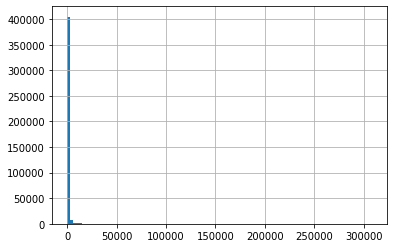

In [13]:
prices.hist(bins=100);

Almost all prices are less 50000.

Sorted prices:

In [14]:
prices.sort_values()

shop_id  item_id
58       11865           0.090000
         20146           0.095833
6        11864           0.096667
         11872           0.096667
44       11853           0.100000
                        ...      
12       14173       40900.000000
         7238        42000.000000
         7241        49782.000000
25       13199       50999.000000
12       6066       307980.000000
Name: item_price, Length: 417004, dtype: float64

In [15]:
{f'{key} %': value for key, value in zip(np.linspace(95, 99.5, 10), np.percentile(prices, np.linspace(95, 99.5, 10)))}

{'95.0 %': 2499.0,
 '95.5 %': 2599.0,
 '96.0 %': 2749.0,
 '96.5 %': 2938.9178999999995,
 '97.0 %': 3013.8371249999936,
 '97.5 %': 3374.0,
 '98.0 %': 3799.0,
 '98.5 %': 4833.9250000000275,
 '99.0 %': 7990.0,
 '99.5 %': 12490.0}

So, there are few items with large prices.

The most expensive item is:

In [17]:
items.loc[6066]

item_name                     Radmin 3  - 522 лиц.
item_category_id                                75
item_category_name    Программы - Для дома и офиса
Name: 6066, dtype: object

The cheapest item is:

In [18]:
items.loc[11865]

item_name             Змей МАКС антистресс 33 см.
item_category_id                               63
item_category_name       Подарки - Мягкие игрушки
Name: 11865, dtype: object

The graphic of the total income of all shops:

<AxesSubplot:xlabel='date_block_num'>

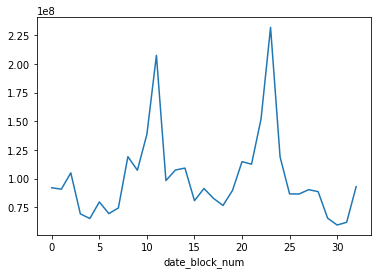

In [19]:
train_df.groupby('date_block_num').total_income.sum().plot()

Scatter plot of *item_price* and *item_cnt_day*:

In [20]:
price_and_count = train_df.groupby(['shop_id', 'item_id']).aggregate({'item_price': 'mean', 'item_cnt_day': 'sum'})

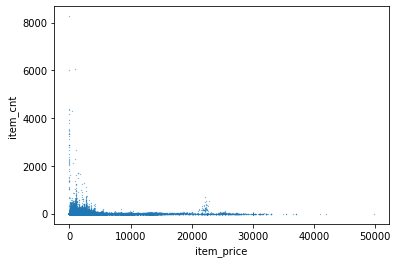

In [23]:
cutted_price_and_count = price_and_count[(price_and_count.item_price < 50000) & (price_and_count.item_cnt_day < 10000)]
plt.scatter(cutted_price_and_count.item_price, cutted_price_and_count.item_cnt_day, s=0.05)
plt.xlabel('item_price')
plt.ylabel('item_cnt')
plt.show()

It shows that *item_cnt* is large iff *item_price* is small.

Info about start and end selling month:

In [41]:
sales_interval = train_df.groupby(['shop_id', 'item_id']).agg({
    'date_block_num': ['max', 'min']
}).set_axis(['max_date', 'min_date'], axis=1)
sales_interval['date_interval'] = sales_interval['max_date'] - sales_interval['min_date'] + 1

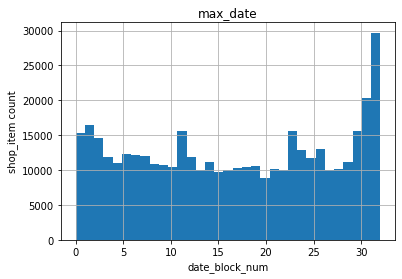

In [42]:
sales_interval.max_date.hist(bins=33)
plt.xlabel('date_block_num')
plt.ylabel('shop_item count')
plt.title('max_date')
plt.show()

So there is a small part of "shop_items" for that *max_date* is the last month. "shop_items" with small *max_date* have small possibility to be sold. And the amount of such "shop_items" is big.

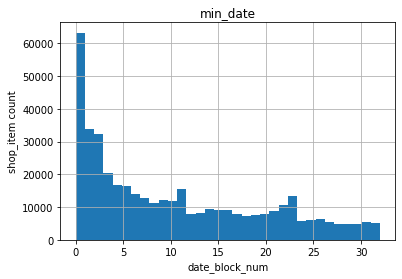

In [34]:
sales_interval.min_date.hist(bins=33)
plt.xlabel('date_block_num')
plt.ylabel('shop_item count')
plt.title('min_date')
plt.show()

Also there are many "shop_items" for that *min_date* is not 0.

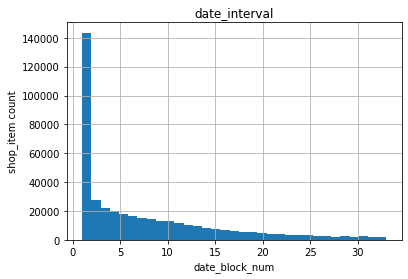

In [35]:
sales_interval.date_interval.hist(bins=33)
plt.xlabel('date_block_num')
plt.ylabel('shop_item count')
plt.title('date_interval')
plt.show()

About 143518/417004 = 34.416% of all "shop_items" were being sold only for a month

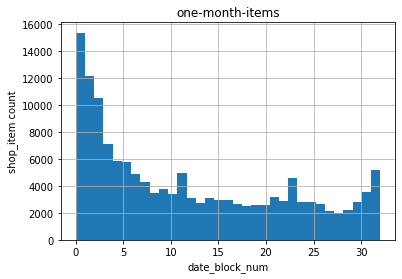

In [36]:
sales_interval[sales_interval.date_interval == 1].max_date.hist(bins=33)
plt.xlabel('date_block_num')
plt.ylabel('shop_item count')
plt.title('one-month-items')
plt.show()

And many of such "shop_items" were bere being sold very far. So the predicted selling count is 0.

Here the count of months during that the items were being sold.

In [37]:
sales_month_count = train_df.groupby(['shop_id', 'item_id']).date_block_num.nunique()

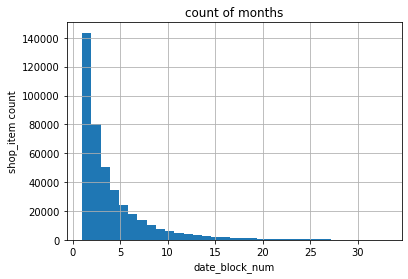

In [39]:
sales_month_count.hist(bins=33)
plt.xlabel('date_block_num')
plt.ylabel('shop_item count')
plt.title('count of months')
plt.show()

So there are many "shop_items" that were being sold for a few months (not necessarily consecutive). It is obviously that this histogram is not the same as the histogram for *date_interval*. It means that there is "shop_items" with "empty" months (when the selling count is 0). It should be considered.

In [43]:
shop_item_info = train_df.groupby(['shop_id', 'item_id', 'date_block_num']).agg({
    'item_price': 'mean',
    'item_cnt_day': 'sum',
    'total_income': 'sum'
})

In [44]:
shop_item_info.head()

item_price  item_cnt_day  total_income
shop_id item_id date_block_num                                        
0       30      1                    265.0          31.0        8215.0
        31      1                    434.0          11.0        4774.0
        32      0                    221.0           6.0        1326.0
                1                    221.0          10.0        2210.0
        33      0                    347.0           3.0        1041.0

In [61]:
list(item_categories.item_category_name)

['PC - Гарнитуры/Наушники',
 'Аксессуары - PS2',
 'Аксессуары - PS3',
 'Аксессуары - PS4',
 'Аксессуары - PSP',
 'Аксессуары - PSVita',
 'Аксессуары - XBOX 360',
 'Аксессуары - XBOX ONE',
 'Билеты (Цифра)',
 'Доставка товара',
 'Игровые консоли - PS2',
 'Игровые консоли - PS3',
 'Игровые консоли - PS4',
 'Игровые консоли - PSP',
 'Игровые консоли - PSVita',
 'Игровые консоли - XBOX 360',
 'Игровые консоли - XBOX ONE',
 'Игровые консоли - Прочие',
 'Игры - PS2',
 'Игры - PS3',
 'Игры - PS4',
 'Игры - PSP',
 'Игры - PSVita',
 'Игры - XBOX 360',
 'Игры - XBOX ONE',
 'Игры - Аксессуары для игр',
 'Игры Android - Цифра',
 'Игры MAC - Цифра',
 'Игры PC - Дополнительные издания',
 'Игры PC - Коллекционные издания',
 'Игры PC - Стандартные издания',
 'Игры PC - Цифра',
 'Карты оплаты (Кино, Музыка, Игры)',
 'Карты оплаты - Live!',
 'Карты оплаты - Live! (Цифра)',
 'Карты оплаты - PSN',
 'Карты оплаты - Windows (Цифра)',
 'Кино - Blu-Ray',
 'Кино - Blu-Ray 3D',
 'Кино - Blu-Ray 4K',
 'Кино - DV

In [80]:
list(items[items.item_name.str.contains('\Wакция\W', regex=True)].item_name)

['Movavi  Видеоредактор  версия Персональная 10 (акция)  [PC, Цифровая версия]',
 'Movavi Video Suite версия Персональная 14 (акция)  [PC, Цифровая версия]',
 'Movavi Фоторедактор Персональная версия 2 (акция)  [PC, Цифровая версия]']

In [81]:
pd.merge(train_df, items[items.item_name.str.contains('\Wакция\W', regex=True)], on='item_id', how='inner')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id_x,total_income,days,weeks,item_name,item_category_id_y,item_category_name


In [82]:
items[items.item_name.str.contains('\Wакция\W', regex=True)]

,item_name,item_category_id,item_category_name
item_id,,,
4914,Movavi Видеоредактор версия Персональная 10 ...,76,Программы - Для дома и офиса (Цифра)
4945,Movavi Video Suite версия Персональная 14 (акц...,76,Программы - Для дома и офиса (Цифра)
4958,Movavi Фоторедактор Персональная версия 2 (акц...,76,Программы - Для дома и офиса (Цифра)


In [89]:
items.index.difference(train_df.item_id)

Int64Index([   83,   138,   139,   140,   146,   147,   159,   168,   173,
              174,
            ...
            21973, 21974, 21975, 22004, 22005, 22006, 22022, 22035, 22137,
            22158],
           dtype='int64', name='item_id', length=838)

Some items are absent in *train_df*. They can be in *test_df*. So the *item_cnt* can't be predicted for them.